# Mineração de dados

## Exploratory Analysis

In [78]:
import numpy as np
import pandas as pd# Aprendizado de Comitês
import matplotlib.pyplot as plt

df_adults = pd.read_csv('datasets/adult.csv')
df_adults.drop_duplicates(keep=False, inplace=True)
df_adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48741 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48741 non-null  int64 
 1   workclass        48741 non-null  object
 2   fnlwgt           48741 non-null  int64 
 3   education        48741 non-null  object
 4   educational-num  48741 non-null  int64 
 5   marital-status   48741 non-null  object
 6   occupation       48741 non-null  object
 7   relationship     48741 non-null  object
 8   race             48741 non-null  object
 9   gender           48741 non-null  object
 10  capital-gain     48741 non-null  int64 
 11  capital-loss     48741 non-null  int64 
 12  hours-per-week   48741 non-null  int64 
 13  native-country   48741 non-null  object
 14  income           48741 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


In [79]:
df_adults[df_adults.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              0 non-null      int64 
 1   workclass        0 non-null      object
 2   fnlwgt           0 non-null      int64 
 3   education        0 non-null      object
 4   educational-num  0 non-null      int64 
 5   marital-status   0 non-null      object
 6   occupation       0 non-null      object
 7   relationship     0 non-null      object
 8   race             0 non-null      object
 9   gender           0 non-null      object
 10  capital-gain     0 non-null      int64 
 11  capital-loss     0 non-null      int64 
 12  hours-per-week   0 non-null      int64 
 13  native-country   0 non-null      object
 14  income           0 non-null      object
dtypes: int64(6), object(9)
memory usage: 0.0+ bytes


### Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

In [80]:
df_adults.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48741.000000,4.874100e+04,48741.000000,48741.000000,48741.000000,48741.000000
mean,38.661107,1.896775e+05,10.079235,1081.303646,87.683634,40.429577
std,13.706556,1.056289e+05,2.569661,7459.574110,403.402187,12.393710
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175560e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781370e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.375810e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


* ***age***: continuous.
* ***workclass***: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* ***fnlwgt***: continuous.
* ***education***: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* ***education-num***: continuous.
* ***marital-status***: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* ***occupation***: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* ***relationship***: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* ***race***: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* ***sex***: Female, Male.
* ***capital-gain***: continuous.
* ***capital-loss***: continuous.
* ***hours-per-week***: continuous.
* ***native-country***: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* ***class***: >50K, <=50K


### Exibi as 10 primeiras linhas do dataset


In [81]:
df_adults.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


###  Class Label | class: >50K, <=50K or workclass: > Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

In [82]:
df_adults.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Attr: Hours work by week
Max : 99
Min : 1
Variance: 153.6040525680795
Std : 12.393710201875768
mean : 40.42957674237295
median : 40.0
mode: 0    40
dtype: int64
1 quartile 25%: 40.0
2 quartile 50%: 40.0
3 quartile 75%: 45.0

IQR: 5.0

Histogram


<AxesSubplot:>

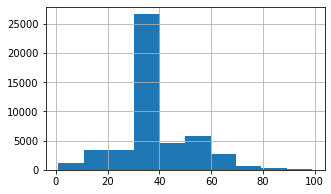

In [117]:
print('Attr: Hours work by week')
df_attr = df_adults["hours-per-week"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print(f'IQR: {df_attr.quantile(q=0.75)-df_attr.quantile(q=0.25)}\n')
print('Histogram')
df_attr.hist(figsize=(5,3))

Attr: Age
Max : 90
Min : 17
Variance: 187.86967911174486
Std : 13.706556063130696
mean : 38.661106665846
median : 37.0
mode: 0    36
dtype: int64
1 quartile 25%: 28.0
2 quartile 50%: 37.0
3 quartile 75%: 48.0

Histogram


<AxesSubplot:>

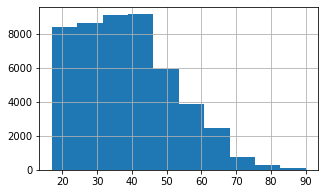

In [114]:
print('Attr: Age')
df_attr = df_adults["age"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram')
df_attr.hist(figsize=(5,3))

In [ ]:
print('Attr: fnlwgt')
df_attr = df_adults["fnlwgt"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram')
df_attr.hist(figsize=(5,3))

In [ ]:
print('Attr: Age')
df_attr = df_adults["age"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram')
df_attr.hist(figsize=(5,3))

In [ ]:
print('Attr: Age')
df_attr = df_adults["age"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram')
df_attr.hist(figsize=(5,3))

In [ ]:
print('Attr: Age')
df_attr = df_adults["age"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram')
df_attr.hist(figsize=(5,3))

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='fnlwgt', ylabel='age'>,
        <AxesSubplot:xlabel='educational-num', ylabel='age'>,
        <AxesSubplot:xlabel='capital-gain', ylabel='age'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='age'>,
        <AxesSubplot:xlabel='hours-per-week', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='fnlwgt', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='educational-num', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='capital-gain', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='hours-per-week', ylabel='fnlwgt'>],
       [<AxesSubplot:xlabel='age', ylabel='educational-num'>,
        <AxesSubplot:xlabel='fnlwgt', ylabel='educational-num'>,
        <AxesSubplot:xlabel='educational-num', ylabel='educational-num'>,
        <AxesSubplot:xlabel='capital-gain', ylabel='educational-num'>,
        <AxesSubplot

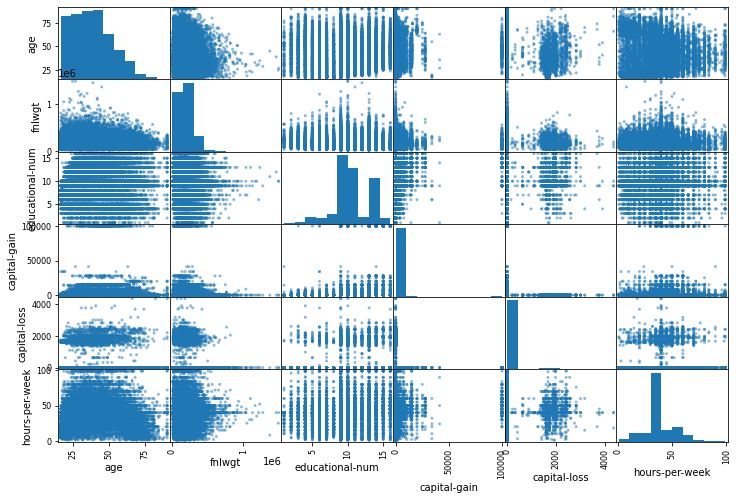

In [85]:
from pandas.plotting import scatter_matrix
attributes = ["age","fnlwgt","educational-num","capital-gain","capital-loss","hours-per-week"]
scatter_matrix(df_adults[attributes], figsize=(12, 8))

## Do we have missing values? Yes